### Decennial Census of Population and Housing

In [22]:
import pandas as pd

states = pd.read_csv('states.csv')
states.head(5)

,Unnamed: 0,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
0,Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
1,Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
2,Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
3,Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
4,California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


#### Aggregate and calculate proportions

In [23]:
# What percentage of Hispanics identify as White?
print(100 * states['hispanic_white'].sum() / states['hispanic'].sum())

54.5246839030109


In [24]:
# Set list of Hispanic race column names
hispanic_races = [
    "hispanic_white", 
    "hispanic_black", "hispanic_aian",
    "hispanic_asian", "hispanic_pacific", 
    "hispanic_other", "hispanic_multiracial"
]

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states['hispanic'].sum())

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64


Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race". Now we will calculate similar percentages for individual states.

In [25]:
# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states_hr[race] / states['hispanic']

# View the result
print(states_hr.head())

   hispanic_white  hispanic_black  hispanic_aian  hispanic_asian  \
0       38.249588        3.703624       1.245137        0.354522   
1       46.513287        3.347856       5.898239        1.722337   
2       51.261088        1.050419       2.063321        0.326412   
3       38.570277        1.501209       1.109917        0.244558   
4       46.366571        0.965254       1.431105        0.613235   

   hispanic_pacific  hispanic_other  hispanic_multiracial  
0          0.582429       50.042564              5.822136  
1          0.484089       25.455426             16.578766  
2          0.089122       39.739408              5.470230  
3          0.190271       52.378393              6.005375  
4          0.112811       44.469173              6.041851  


#### Identify extreme values

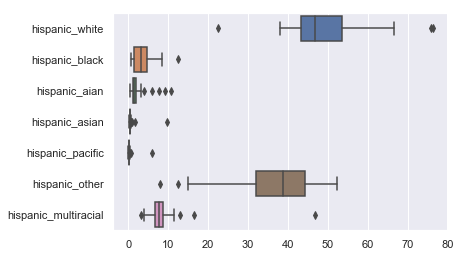

hispanic_white          76.339680
hispanic_black           3.521989
hispanic_aian            0.572777
hispanic_asian           0.227402
hispanic_pacific         0.060633
hispanic_other          14.978955
hispanic_multiracial     4.298564
Name: 9, dtype: float64
hispanic_white          75.862495
hispanic_black          12.385538
hispanic_aian            0.528948
hispanic_asian           0.105762
hispanic_pacific         0.007944
hispanic_other           7.831978
hispanic_multiracial     3.277334
Name: 39, dtype: float64
hispanic_white          22.555072
hispanic_black           1.257841
hispanic_aian            1.109714
hispanic_asian           9.751576
hispanic_pacific         5.958193
hispanic_other          12.493173
hispanic_multiracial    46.874431
Name: 11, dtype: float64


In [26]:
# Import seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Create a boxplot
sns.boxplot(data= states_hr, orient = 'h')
plt.show()

# Show states with extreme values in various columns
print(states_hr.nlargest(1, 'hispanic_white').squeeze())
print(states_hr.nsmallest(1, 'hispanic_other').squeeze())
print(states_hr.nlargest(1, 'hispanic_asian').squeeze())

#### The basic API request

In [27]:
import requests

# Build base URL
HOST = 'https://api.census.gov/data'
year = '2010'
dataset = 'dec/sf1'
base_url = '/'.join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

#### The API response and Pandas

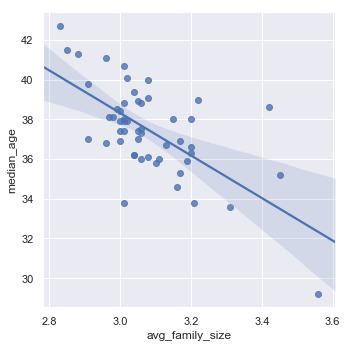

In [28]:
# Construct the data frame
col_names = ["name", "median_age", "avg_family_size", "state"]
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

 Notice that larger average family size means more children per adult, and is correlated with lower median age.

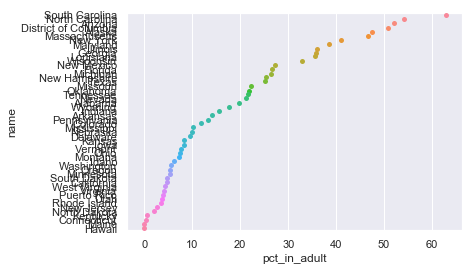

In [29]:
# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states["in_adult"] / (states["in_adult"] + states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

#### Specific places

In [30]:
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000"
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


In [31]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
print(cd["avg_family_size"].head())

# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
print(cd)

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object
                                                 name  avg_family_size state  \
0   Congressional District 1 (111th Congress), Pen...         655146.0    42   
1   Congressional District 2 (111th Congress), Pen...         630277.0    42   
2   Congressional District 3 (111th Congress), Pen...         640356.0    42   
3   Congressional District 4 (111th Congress), Pen...         647418.0    42   
4   Congressional District 5 (111th Congress), Pen...         651762.0    42   
5   Congressional District 8 (111th Congress), Pen...         672685.0    42   
6   Congressional District 6 (111th Congress), Pen...         726465.0    42   
7   Congressional District 7 (111th Congress), Pen...         673623.0    42   
8   Congressional District 11 (111th Congress), Pe...         687860.0    42   
9   Congressional District 9 (111th Congress), Pen...         666810.0    42   
10  Congressional Distr

In [32]:
# Build dictionary of predicates and execute the request
predicates = {}
predicates["get"] = ",".join(["NAME",  "P001001"])
predicates["for"] = "zip code tabulation area (or part):*"
predicates["in"] = "state:01"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "total_pop", "state", "zcta"]
zctas = pd.DataFrame(columns=col_names, data=r.json()[1:])
zctas["total_pop"] = zctas["total_pop"].astype(int)

# Set multilevel index from GEOIDs and print the head
zctas.set_index(["state", "zcta"], inplace = True)
print(zctas.head())

                             name  total_pop
state zcta                                  
01    35650  ZCTA5 35650, Alabama      13971
      35652  ZCTA5 35652, Alabama       8190
      35653  ZCTA5 35653, Alabama      11150
      35654  ZCTA5 35654, Alabama       8685
      35660  ZCTA5 35660, Alabama       9042


 Notice that some of the ZCTAs are labelled "part". It is common in rural areas for ZIP Codes to overlap state borders.